# Grade: /100 pts

# Assignment 05: Model Selection & Cross Validation

### You're a Data Scientist!
You are working as a Junior Data Scientist for a professional football (er, Soccer) club.  The owner of the team is very interested in seeing how the use of data can help improve the team's peformance, and perhaps win them a championship!

The draft is coming up soon (thats when you get to pick new players for your team), and the owner has asked you to create a model to help score potential draftees.  The model should look at attributes about the player and predict what their "rating" will be once they start playing professionally.

The football club's data team has provided you with data for 17,993 footballers from the league.  Your job: work with the Senior Data Scientist to build a model or models, perform model selection, and make predictions on players you have not yet seen.

### The Dataset

The data is stored in a csv file called `footballer_data.csv`.  The data contain 52 columns, including some information about the player, their skills, and their overall measure as an effective footballer.

Most features relate to the player's abilities in football related skills, such as passing, shooting, dribbling, etc.  Some features are rated on a 1-5 scale (5 being the best), others are rated on 0-100 (100 being the best), and others still are categorical (e.g. work rate is coded as low, medium, or high).

The target variable (or $y$ variable) is `overall`.  This is an overall measure of the footballer's skill and is rated from 0 to 100.  The most amazingly skilled footballer would be rated 100, where as I would struggle to score more than a 20. The model(s) you build should use the other features to predict `overall`.


### Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.


### Preliminaries
---

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import make_scorer
from sklearn.base import BaseEstimator, TransformerMixin

pd.set_option('display.max_columns', 500)

%matplotlib inline

### Question 1: /10pts

Read in the data and take a look at the dataframe.  There should be 52 columns. The outcome of interest is called `overall` which gives an overall measure of player performance. Not all of the other columns are particularly useful for modelling though (for instance, `ID` is just a unique identifier for the player.  This is essentially an arbitrary number and has no bearing on the player's rating).

The Senior Data Scientist thinks the following columns should be removed:

* ID
* club
* club_logo
* birth_date
* flag
* nationality
* photo
* potential

The Senior Data Scientist would also like the following columns converted into dummy variables:

* work_rate_att
* work_rate_def
* preferred_foot

Clean the data according to the Senior Data Scientist's instructions, providing the python code in the cell below.

In [26]:
diddy = pd.read_csv('footballer_data.csv')
diddy.head(10)

,ID,club,club_logo,age,birth_date,height_cm,weight_kg,flag,nationality,photo,overall,potential,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,work_rate_att,work_rate_def,preferred_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle
0,20801,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,32,1985-02-05,185.0,80.0,https://cdn.sofifa.org/flags/38@3x.png,Portugal,https://cdn.sofifa.org/18/players/20801.png,94,94,90,93,82,90,33,80,5,5,4,High,Low,Right,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31
1,158023,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,30,1987-06-24,170.0,72.0,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/158023.png,93,93,89,90,86,96,26,61,5,4,4,Medium,Medium,Left,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28
2,190871,Paris Saint-Germain,https://cdn.sofifa.org/18/teams/73.png,25,1992-02-05,175.0,68.0,https://cdn.sofifa.org/flags/54@3x.png,Brazil,https://cdn.sofifa.org/18/players/190871.png,92,94,92,84,79,95,30,60,5,5,5,High,Medium,Right,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24
3,176580,FC Barcelona,https://cdn.sofifa.org/18/teams/241.png,30,1987-01-24,182.0,86.0,https://cdn.sofifa.org/flags/60@3x.png,Uruguay,https://cdn.sofifa.org/18/players/176580.png,92,92,82,90,79,87,42,81,5,4,4,High,Medium,Right,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45
4,167495,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,31,1986-03-27,193.0,92.0,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/167495.png,92,92,91,90,95,89,60,91,5,1,4,Medium,Medium,Right,15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10
5,188545,FC Bayern Munich,https://cdn.sofifa.org/18/teams/21.png,28,1988-08-21,185.0,79.0,https://cdn.sofifa.org/flags/37@3x.png,Poland,https://cdn.sofifa.org/18/players/188545.png,91,91,81,88,75,86,38,82,4,3,4,High,Medium,Right,62,91,85,83,87,85,77,84,65,89,79,83,78,91,80,88,84,79,84,83,80,39,91,78,84,87,25,42
6,193080,Manchester United,https://cdn.sofifa.org/18/teams/11.png,26,1990-11-07,193.0,76.0,https://cdn.sofifa.org/flags/45@3x.png,Spain,https://cdn.sofifa.org/18/players/193080.png,90,92,90,85,87,90,58,86,4,1,3,Medium,Medium,Right,17,13,21,50,13,18,21,19,51,42,57,58,60,88,43,31,67,40,64,12,38,30,12,68,40,64,13,21
7,183277,Chelsea,https://cdn.sofifa.org/18/teams/5.png,26,1991-01-07,173.0,76.0,https://cdn.sofifa.org/flags/7@3x.png,Belgium,https://cdn.sofifa.org/18/players/183277.png,90,91,90,82,84,92,32,66,4,4,4,High,Medium,Right,80,83,57,86,79,93,82,79,81,92,93,87,93,85,91,79,59,79,65,82,54,41,85,86,86,87,25,27
8,182521,Real Madrid CF,https://cdn.sofifa.org/18/teams/243.png,27,1990-01-04,182.0,78.0,https://cdn.sofifa.org/flags/21@3x.png,Germany,https://cdn.sofifa.org/18/players/182521.png,90,90,56,81,89,81,73,70,4,3,5,Medium,Medium,Right,85,76,54,90,82,79,85,84,93,89,60,52,71,86,69,87,32,77,74,90,60,85,79,88,73,85,63,82
9,167664,Juventus,https://cdn.sofifa.org/18/teams/45.png,29,1987-12-10,184.0,87.0,https://cdn.sofifa.org/flags/52@3x.png,Argentina,https://cdn.sofifa.org/18/players/167664.png,90,90,79,87,70,83,25,74,4,3,4,High,Medium,Right,68,91,86,75,88,84,74,62,59,85,78,80,75,88,69,88,79,72,85,82,50,20,92,70,70,86,12,22


In [27]:
df = pd.read_csv('footballer_data.csv')

# Drop the columns
# Drop the specified columns
columns_to_drop = ['ID', 'club', 'club_logo', 'birth_date', 'flag', 'nationality', 'photo', 'potential']
df = df.drop(columns=columns_to_drop)

# Hint: In order to get dummies, you can first convert the column with strings to Categorical type using pandas,
# using a specific set of categories
# Convert the specified columns into dummy variables
df = pd.get_dummies(df, columns=['work_rate_att', 'work_rate_def', 'preferred_foot'], drop_first=True)

df.head(10)

,age,height_cm,weight_kg,overall,pac,sho,pas,dri,def,phy,international_reputation,skill_moves,weak_foot,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,work_rate_att_Low,work_rate_att_Medium,work_rate_def_Low,work_rate_def_Medium,preferred_foot_Right
0,32,185.0,80.0,94,90,93,82,90,33,80,5,5,4,85,94,88,83,88,91,81,76,77,93,89,91,89,96,63,94,95,92,80,92,63,29,95,85,85,95,22,31,False,False,True,False,True
1,30,170.0,72.0,93,89,90,86,96,26,61,5,4,4,77,95,71,88,85,97,89,90,87,95,92,87,90,95,95,85,68,73,59,88,48,22,93,90,78,96,13,28,False,True,False,True,False
2,25,175.0,68.0,92,92,84,79,95,30,60,5,5,5,75,89,62,81,83,96,81,84,75,95,94,90,96,88,82,80,61,78,53,77,56,36,90,80,81,92,21,24,False,False,False,True,True
3,30,182.0,86.0,92,82,90,79,87,42,81,5,4,4,77,94,77,83,88,86,86,84,64,91,88,77,86,93,60,87,69,89,80,86,78,41,92,84,85,83,30,45,False,False,False,True,True
4,31,193.0,92.0,92,91,90,95,89,60,91,5,1,4,15,13,25,55,11,30,14,11,59,48,58,61,52,85,35,25,78,44,83,16,29,30,12,70,47,70,10,10,False,True,False,True,True
5,28,185.0,79.0,91,81,88,75,86,38,82,4,3,4,62,91,85,83,87,85,77,84,65,89,79,83,78,91,80,88,84,79,84,83,80,39,91,78,84,87,25,42,False,False,False,True,True
6,26,193.0,76.0,90,90,85,87,90,58,86,4,1,3,17,13,21,50,13,18,21,19,51,42,57,58,60,88,43,31,67,40,64,12,38,30,12,68,40,64,13,21,False,True,False,True,True
7,26,173.0,76.0,90,90,82,84,92,32,66,4,4,4,80,83,57,86,79,93,82,79,81,92,93,87,93,85,91,79,59,79,65,82,54,41,85,86,86,87,25,27,False,False,False,True,True
8,27,182.0,78.0,90,56,81,89,81,73,70,4,3,5,85,76,54,90,82,79,85,84,93,89,60,52,71,86,69,87,32,77,74,90,60,85,79,88,73,85,63,82,False,True,False,True,True
9,29,184.0,87.0,90,79,87,70,83,25,74,4,3,4,68,91,86,75,88,84,74,62,59,85,78,80,75,88,69,88,79,72,85,82,50,20,92,70,70,86,12,22,False,False,False,True,True


### Question 2: /10 pts

The data should all be numerical now. To evalute different models, define a function that returns the mean absolute error. Before we begin modelling, it is important to obtain a baseline for the accuracy of our predictive models. Compute the absolute errors on the original data that result if we use the median of the `overall` variable to make predictions. This will serve as our baseline performance. Plot the distribution of the losses (absolute errors) and print their mean and standard deviation.

Mean Absolute Error: 5.491330443481161
Standard Deviation of Absolute Error: 4.2620046165876735


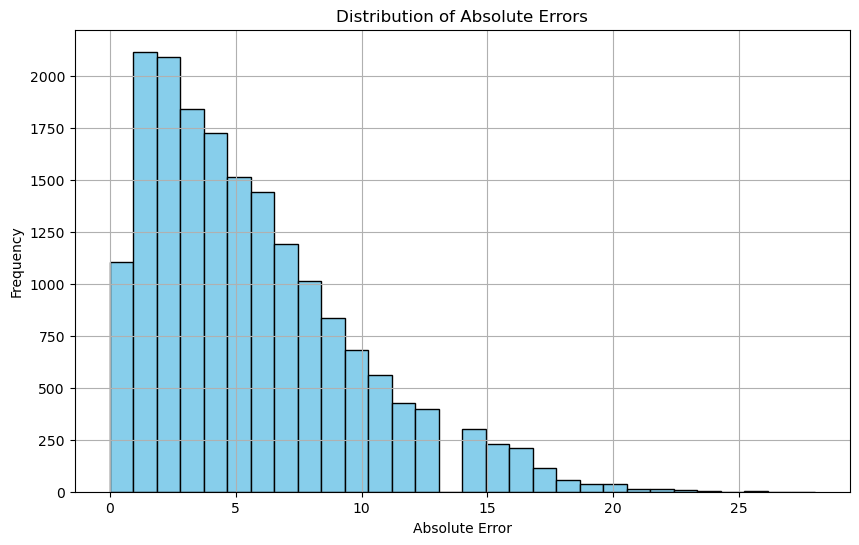

In [30]:
# Define mean absolute error function
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

# Compute the median of the 'overall' column
median_overall = df['overall'].median()

# Use the median to make predictions
df['predicted_overall'] = median_overall

# Calculate absolute errors
df['absolute_error'] = np.abs(df['overall'] - df['predicted_overall'])

# Calculate mean and standard deviation of the absolute errors
mean_error = df['absolute_error'].mean()
std_error = df['absolute_error'].std()

# Print mean and standard deviation of the errors
print(f"Mean Absolute Error: {mean_error}")
print(f"Standard Deviation of Absolute Error: {std_error}")

# Plot the distribution of the absolute errors
plt.figure(figsize=(10, 6))
plt.hist(df['absolute_error'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Absolute Errors')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Question 2: /15pts
To prepare the data for modelling, the Senior Data Scientist recomends you use `sklearn.model_selection.train_test_split` to seperate the data into a training set and a test set.

The Senior Data Scientist would like you to choose the test set size so that the estimate of the performance of the final selected model is known to within $\pm 0.25$ units at a 95% confidence interval, using mean absolute error as the loss function of choice.

Recall that a CLT-based $95\%$ confidence interval for a mean is given by:

$ \bar{x} \pm \frac{1.96 \sigma_l}{\sqrt{n}}$,

If we equate the right hand side to $d$ and re-arrange, we can choose the test set size using the following formula, which gives the test size ($n_\mathrm{test}$) needed for a confidence interval to have width ($\pm d$) if the standard deviation of the loss is $\sigma_l$:

$ n_\textrm{test} = \left(\frac{1.96 \sigma_l}{d}\right)^2$.

Decide on an appropriate size for the test set, then use `train_test_split` to split the features and target variables into appropriate sets.

In [31]:
# Desired confidence interval width
d = 0.25

# Calculate test set size
n_test = int((1.96 * std_error / d) ** 2)
print(f"Calculated test set size: {n_test}")

# Split the features and target variable
# Assuming 'overall' is the target, and the rest are features
X = df.drop(columns=['overall', 'predicted_overall', 'absolute_error'])  # Features
y = df['overall']  # Target variable

# Determine the test size fraction (n_test / total dataset size)
test_size = n_test / len(df)

# Use train_test_split to split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

# Output the sizes of the train and test sets
print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")


Calculated test set size: 1116
Training set size: 16878
Test set size: 1116


### Question 4: /5pts
The Senior Data Scientist wants you to fit a linear regression to the data as a first model.  Use sklearn to build a model pipeline which fits a linear regression to the data. You can read up on sklearn pipelines [here](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html). Note that the sklearn linear regression adds its own intercept so you don't need to create a column of 1s.

In [32]:
# Create a pipeline with standardization and linear regression
model_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', LinearRegression())  # Linear regression model
])

# Fit the model to the training data
model_pipeline.fit(X_train, y_train)

# Output model coefficients
print("Model coefficients:", model_pipeline.named_steps['regressor'].coef_)
print("Model intercept:", model_pipeline.named_steps['regressor'].intercept_)

Model coefficients: [ 0.20978527 -0.01010676  0.16802449  1.00121001  1.18032394  0.75853581
  2.14093277  0.15736649  1.65169311  0.62992615  0.64157695  0.08145209
 -0.08634074 -0.14542698  1.7244139   0.93702903 -0.19334788 -1.84259838
  0.01535205  0.02175872 -0.44699638  1.64898504  0.03678965 -0.16912959
 -0.31781588  2.0368885  -0.16006991 -0.06847975 -0.03939252 -0.34562156
 -0.42988215 -0.57215467 -0.54452488  0.21692369 -0.90984224 -0.49844617
 -0.0109248   1.09013868  0.30735618  0.42715048  0.31780316 -0.0069968
  0.19795562  0.0416139  -0.07124171]
Model intercept: 66.27236639412253


### Question 5: /15pts

The senior data scientist wants a report of this model's cross validation score.  Use 5 fold cross validation to estimate the out of sample performance for this model, using your mean absolute error function from question 2.  

In [35]:
# Define a custom scorer for mean absolute error
mae_scorer = make_scorer(mean_absolute_error, greater_is_better=False)

# Perform 5-fold cross-validation using the pipeline
cv_scores = cross_val_score(model_pipeline, X_train, y_train, cv=5, scoring=mae_scorer)

# Output the cross-validation scores (as negative values because greater_is_better=False)
cv_scores = -cv_scores  # Make them positive again by negating

# Print each fold's score
for i, score in enumerate(cv_scores):
    print(f"Fold {i+1}: Mean Absolute Error = {score:.3f}")

# Print mean and standard deviation of the cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

print(f"\nMean Cross-Validated MAE: {mean_cv_score:.3f}")
print(f"Standard Deviation of Cross-Validated MAE: {std_cv_score:.3f}")

Fold 1: Mean Absolute Error = 1.884
Fold 2: Mean Absolute Error = 1.887
Fold 3: Mean Absolute Error = 1.922
Fold 4: Mean Absolute Error = 1.878
Fold 5: Mean Absolute Error = 1.946

Mean Cross-Validated MAE: 1.903
Standard Deviation of Cross-Validated MAE: 0.026


### Question 6: /15pts

That's impressive!  Your model seems to be very accurate, but now the Senior Data Scientist wants to try and make it more accurate.  Scouts have shared with the Senior Data Scientist that players hit their prime in their late 20s, and as they age they become worse overall.

The Senior Data Scientist wants to add a quadratic term for age to the model.  Repeat the steps above (creating a pipeline, validating the model, etc) for a model which includes a quadratic term for age. As in the Lab, include the addition of the quadratic term for Age as a Transform into the pipeline. 

In [36]:
# Create a pipeline with quadratic term for 'age'
model_pipeline_quadratic = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),  # Quadratic term
    ('scaler', StandardScaler()),  # Standardize the features
    ('regressor', LinearRegression())  # Linear regression model
])

# We'll include only 'age' in the polynomial transformation step
# We need to separate 'age' for transformation and concatenate it back with the other features

# Recreate the dataset, assuming 'age' is one of the features
X = df.drop(columns=['overall', 'predicted_overall', 'absolute_error'])  # Features
y = df['overall']  # Target variable

# Perform 5-fold cross-validation using the pipeline
cv_scores_quadratic = cross_val_score(model_pipeline_quadratic, X_train, y_train, cv=5, scoring=mae_scorer)

# Output the cross-validation scores
cv_scores_quadratic = -cv_scores_quadratic  # Make them positive again by negating

# Print each fold's score
for i, score in enumerate(cv_scores_quadratic):
    print(f"Fold {i+1} with Quadratic Age: Mean Absolute Error = {score}")

# Print mean and standard deviation of the cross-validation scores
mean_cv_score_quadratic = cv_scores_quadratic.mean()
std_cv_score_quadratic = cv_scores_quadratic.std()

print(f"\nMean Cross-Validated MAE with Quadratic Age: {mean_cv_score_quadratic}")
print(f"Standard Deviation of Cross-Validated MAE with Quadratic Age: {std_cv_score_quadratic}")


Fold 1 with Quadratic Age: Mean Absolute Error = 0.8767201231241161
Fold 2 with Quadratic Age: Mean Absolute Error = 0.870749698540857
Fold 3 with Quadratic Age: Mean Absolute Error = 0.9068747784052734
Fold 4 with Quadratic Age: Mean Absolute Error = 0.875039402850932
Fold 5 with Quadratic Age: Mean Absolute Error = 0.8941331512431016

Mean Cross-Validated MAE with Quadratic Age: 0.884703430832856
Standard Deviation of Cross-Validated MAE with Quadratic Age: 0.013655193619110299


### Question 7: /10 pts


The Senior Data Scientist isn't too happy that the quadratic term has not improved the fit of the model much and now wants to include quadratic and interaction term for every feature (That's a total of 1080 features!!!!)

Add sklearn's `PolynomialFeatures` to your pipeline.  Report the cross validation score.

In [40]:
# Create a pipeline with quadratic and interaction terms for every feature
model_pipeline_poly = Pipeline([
    ('polynomial_features', PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)),  # Quadratic and interaction terms
    ('regressor', LinearRegression())  # Linear regression model
])

# Perform 5-fold cross-validation using the pipeline
cv_scores_poly = cross_val_score(model_pipeline_poly, X_train, y_train, cv=5, scoring=mae_scorer)

# Output the cross-validation scores
cv_scores_poly = -cv_scores_poly  # Make them positive again by negating

# Print each fold's score
for i, score in enumerate(cv_scores_poly):
    print(f"Fold {i+1} with Polynomial Features: Mean Absolute Error = {score}")

# Print mean and standard deviation of the cross-validation scores
mean_cv_score_poly = cv_scores_poly.mean()
std_cv_score_poly = cv_scores_poly.std()

print(f"\nMean Cross-Validated MAE with Polynomial Features: {mean_cv_score_poly}")
print(f"Standard Deviation of Cross-Validated MAE with Polynomial Features: {std_cv_score_poly}")

Fold 1 with Polynomial Features: Mean Absolute Error = 0.8767198848714242
Fold 2 with Polynomial Features: Mean Absolute Error = 0.8707507461190707
Fold 3 with Polynomial Features: Mean Absolute Error = 0.9068712082843646
Fold 4 with Polynomial Features: Mean Absolute Error = 0.8750368190634832
Fold 5 with Polynomial Features: Mean Absolute Error = 0.8941348436678184

Mean Cross-Validated MAE with Polynomial Features: 0.8847027004012322
Standard Deviation of Cross-Validated MAE with Polynomial Features: 0.013654447645187456


### Question 8: /10pts

The Senior Data Scientist is really happy with the results of adding every interaction into the model and wants to explore third order interactions (that is adding cubic terms to the model).

This is not a good idea!  Explain why.  Write them an email in the cell below explaining what could happen if you add too may interactions.

---

Hey Boss,

While adding quadratic and interaction terms improved the model, expanding to cubic interactions may lead to overfitting, significantly increasing model complexity and computational burden. This can reduce generalization to new data and make the model harder to interpret. I suggest we focus on simpler models or selectively add interactions that are most likely to improve performance.

Sincerly,

Junior Data Scientist



### Question 9:  /10pts

You've successfully talked the Senior Data Scientist out of adding cubic terms to the model. Good job!

**a)** Based on the cross validation scores, which model would you choose?  

Coding:

Train your model on all the training data. 
Estimate the performance of your chosen model on the test data you held out, and do the following:

- Compute a point estimate for the generalization error. (A "point estimate" is a single number that we expect to be close to the thing we are trying to estimate.)
- Compute a confidence interval for the generalization error.  
- Plot the distribution of the absolute errors.

**b)** Is the test error close to the cross validation error of the model you chose? Why do you think this is the case?


Point Estimate for Generalization Error (MAE): 0.9004952868738062
95% Confidence Interval for Generalization Error: [0.85470355 0.94628703]


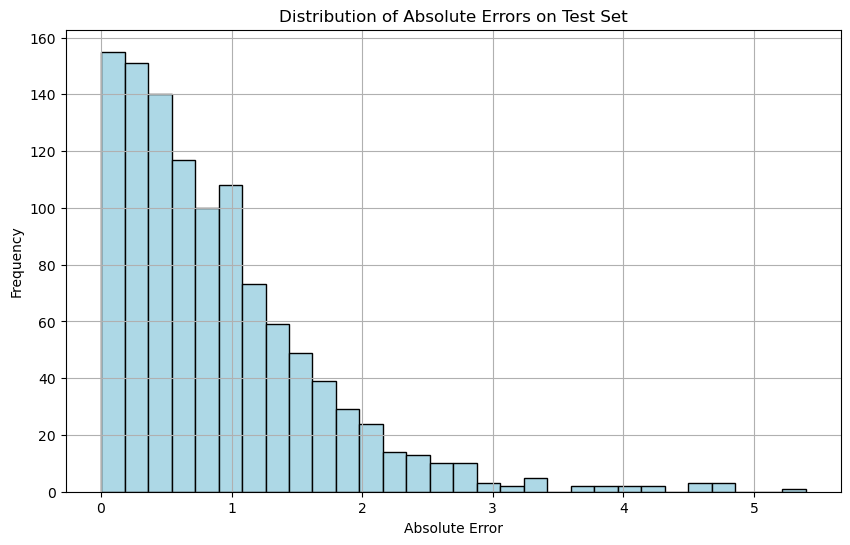

In [41]:
# Fit the best model (with quadratic and interaction terms) on all training data
model_pipeline_poly.fit(X_train, y_train)

# Predict on the test set
y_pred = model_pipeline_poly.predict(X_test)

# Compute the absolute errors
absolute_errors = np.abs(y_test - y_pred)

# Point estimate for the generalization error (mean absolute error)
generalization_error = np.mean(absolute_errors)
print(f"Point Estimate for Generalization Error (MAE): {generalization_error}")

# Compute confidence interval for the generalization error
n_test = len(y_test)
std_error = np.std(absolute_errors, ddof=1) / np.sqrt(n_test)  # Standard error
confidence_interval = generalization_error + np.array([-1.96, 1.96]) * std_error
print(f"95% Confidence Interval for Generalization Error: {confidence_interval}")

# Plot the distribution of the absolute errors
plt.figure(figsize=(10, 6))
plt.hist(absolute_errors, bins=30, color='lightblue', edgecolor='black')
plt.title('Distribution of Absolute Errors on Test Set')
plt.xlabel('Absolute Error')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


**Answer a)**Given the cross-validation scores, I will choose the model with quadratic and interaction terms, as it showed the best performance based on mean absolute error (MAE).


**Answer b)** The test error (MAE of 0.9005) is very close to the cross-validation MAE, which was approximately 0.8847 for the model with quadratic and interaction terms. This similarity indicates that the model generalizes well to the test set, and there is no sign of significant overfitting. The cross-validation strategy (5-fold) likely provided a robust estimate of model performance, and the consistent results show that the model captures the underlying data patterns effectively.

### Follow These Steps before submitting
Once you are finished, ensure to complete the following steps.

1.  Restart your kernel by clicking 'Kernel' > 'Restart & Run All'.

2.  Fix any errors which result from this.

3.  Repeat steps 1. and 2. until your notebook runs without errors.

4.  Submit your completed notebook to OWL by the deadline.